![agh-logo](https://github.com/Wotaker/Macierze/tree/main/prog02/agh_logo.jpeg)

# Program nr 2: Rekurencyjne Odwracanie Mcierzy
### *Mykola Haltiuk, Grzegorz Legęza, Wojciech Ciężobka*

## Analiza algorytmu

### Pseudokod rekurencyjnego algorytmu odwracania macierzy

```python
def inverse(A: Matrix) -> Matrix:

    n = size(A)     # rozmiar macierzy A

    # Warunek brzegowy - trywialna odwrotnoś
    if n == 1:
        return 1 / A

    # Podział macierzy A na bloki o jednakowym rozmiarze
    [A11 A12]
    [A21 A22] = A

    # Zmienne pomocnicze
    A11_inv = inverse(A11)
    S22 = A22 - A21 * A11_inv * A12
    S22_inv = inverse(S22)

    # Oblicznie bloków składających się na macierz wynikową B
    B11 = A11_inv + A11_inv * A12 * S22_inv * A21 * A11_inv
    B12 = -A11_inv * A12 * S22_inv
    B21 = -S22_inv * A21 * A11_inv
    B22 = S22_inv

    # Składanie obliczonych bloków w wynikową macierz B
    B = [B11, B12]
        [B21, B22]

    return B
```

### Pseudokod algorytmu rekurencyjnego mnożenia macierzy
```python
def multiply_strassen_with_classic(A: Matrix, B: Matrix, l: int = 6) -> Matrix:

    def strassen(A: Matrix, B: Matrix, n: int):

        # Warunek brzegowy - trywialne mnożenie
        if n == 1:
            return A * B

        # Warunek brzegowy - rozmiar macierzy suboptymalny aby wywoływać rekurencyjnie
        elif n <= l:
            return multiply_classic(A, B)
        
        # Podział macierzy A na bloki o jednakowym rozmiarze
        [A11 A12]
        [A21 A22] = A

        # Podział macierzy B na bloki o jednakowym rozmiarze
        [B11 B12]
        [B21 B22] = B

        # Wywołania rekurencyjne aby wyliczy macierze pomocnicze P_i, i z {1, 2, ..., 7}
        P1 = strassen(A11 + A22, B11 + B22, n // 2)
        P2 = strassen(A21 + A22, B11, n // 2)
        P3 = strassen(A11, B12 - B22, n // 2)
        P4 = strassen(A22, B21 - B11, n // 2)
        P5 = strassen(A11 + A12, B22, n // 2)
        P6 = strassen(A21 - A11, B11 + B12, n // 2)
        P7 = strassen(A12 - A22, B21 + B22, n // 2)

        # Składanie macierzy wynikowej C z bloków powstałych z P_i
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5
        C21 = P2 + P4
        C22 = P1 - P2 + P3 + P6

        C = [C11, C12]
            [C21, C22]

        return C
    
    return strassen(A, B, size(A))
```

### FLO: liczba operacji zmiennoprzecinkowych w algorytmie

Niech:  
$inv(n)$ - liczba operacji zmiennoprzecinkowych (FLO) dla rekurencyjnego odwracania macierzy rozmiaru $n$,  
$str(n)$ - FLO dla rekurencyjnego mnozenia macierzy algorytmem *Strassen'a*,  
$sum(n)$ - FLO dla sumowania macierzy rozmiaru $n$.

![complexity](https://github.com/Wotaker/Macierze/tree/main/prog02/Macierzowe-prog02.png)

## Eksperymenty

Eksperymenty polegają zbadaniu złożoności algorytmu rekurencyjnego odwracania macierzy poprzez:
* Pomiar złożoności czasowej (średnia artmetyczna z 15 pomiarów)
* Obliczenie liczby wykonanych operacji zmiennoprzecinkowych
  
Wyniki zebraliśmy dla macierzy rozmiaru $2^k\times2^k, k \in \{1, 2, ..., 7\}$. Ograniczenie na rozmiar wynikło z czasu wykonania algorytmu dla dużych macierzy ($k > 7$), ponieważ był on już liczony w minutach i nie było możliwe w sensownym czasie wyliczyć średniej z czasu wykonania. Wartość progowa dla mnozenia z uzyciem algorytmu *Strassena* została dobrana empirycznie i wynosi $l=6$.

### Przygotowanie danych

In [1]:
from inverse import inverse
from utils import *

MAX_K = 8
SEED = 420
REPS = 15
MATRICES_FILE_PATH = f"matrices_k{MAX_K}_s{SEED}.dat"

In [2]:
matrices = generate_data(reps=15, max_k=MAX_K, seed=SEED, path=MATRICES_FILE_PATH, verbose=True)

Matrices 2x2 are ready
Matrices 4x4 are ready
Matrices 8x8 are ready
Matrices 16x16 are ready
Matrices 32x32 are ready
Matrices 64x64 are ready
Matrices 128x128 are ready
Matrices 256x256 are ready


In [3]:
sizes = np.array(list(map(lambda ms: ms[0].shape[0], matrices)))
times = np.array(list(map(lambda set: list(map(lambda m: measure_exec_time(inverse, m), set)), matrices)))
flos = np.array(list(map(lambda n: inv_flo(int(np.log2(n))), sizes)))

### Wykresy

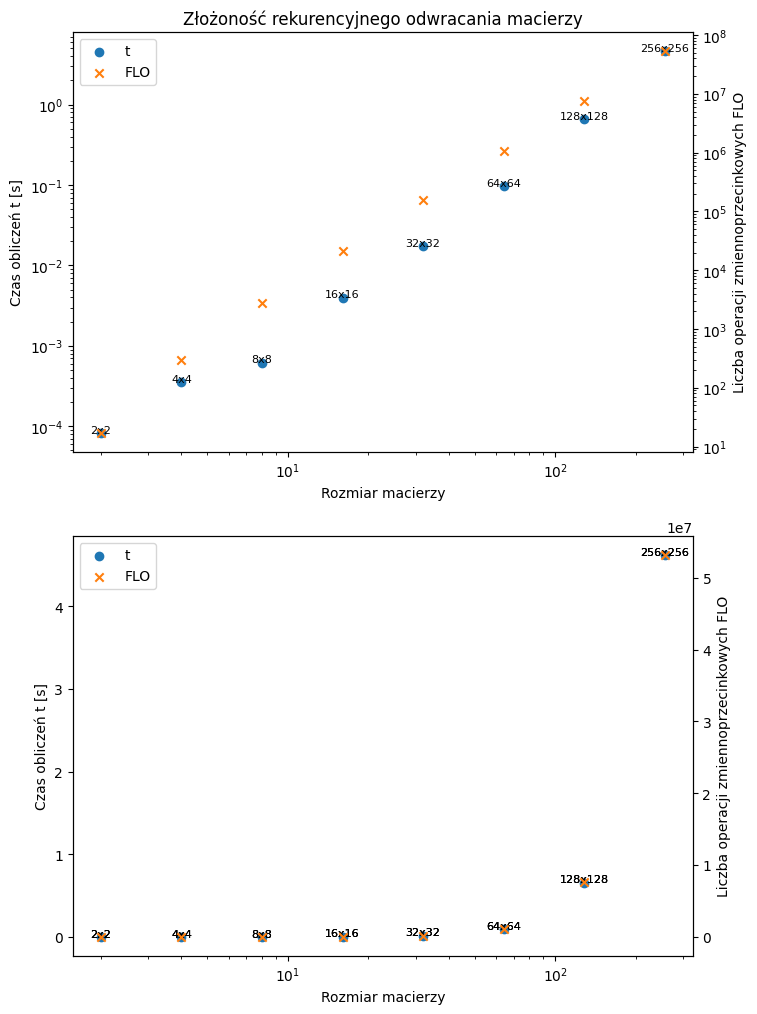

In [4]:
plot_results(sizes, np.mean(times, axis=1), flos)

Wykres górny ma zarówno oś rozmiaru, jak i czasu i złożoności w skali logarytmicznej, przez co złożoność wykładnicza prezentuje się w tej reprezentacji liniowo. Proste aproksymujące odpowiednio zlozonosc czasową odwracania małych ($n <= 4$) i dużych ($n >= 6$) macierzy, są nachylone pod różnymi kątami. Pokazuje to, ze faktycznie w algorytmie występuje pewna wartośc progowa warunkująca jego działanie i jest to próg $l = 6$, który odpowiada za dobór algorytmu mnozenia macierzy (rekurencyjny *Strassena* lub klasyczny).  
Z kolei dolny wykres na którym tylko oś rozmiaru jest w skali logarytmicznej, ukazuje wykładniczy charakter złozoności algorytmu. Widac na nim, że złożoności czasowa oraz liczby operacji są silnie skolerowane, co jest zgodne z intuicją.